# Acc 1 Stock Performance Tracker

## Setup

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils, draw_utils, process_utils, const

In [52]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [53]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME

## Prepare Dataframe

In [54]:
log_df, cf_df = process_utils.prepare_log_df_cf_df()

In [55]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)

/Users/kaestrl/projects/python/stock_tracker/process_utils.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_cf_df[f"{acc_name}_cf"] = acc_cf_df.sum(axis=1)


In [56]:
# user_df.tail(10)

## Charts

### NAV

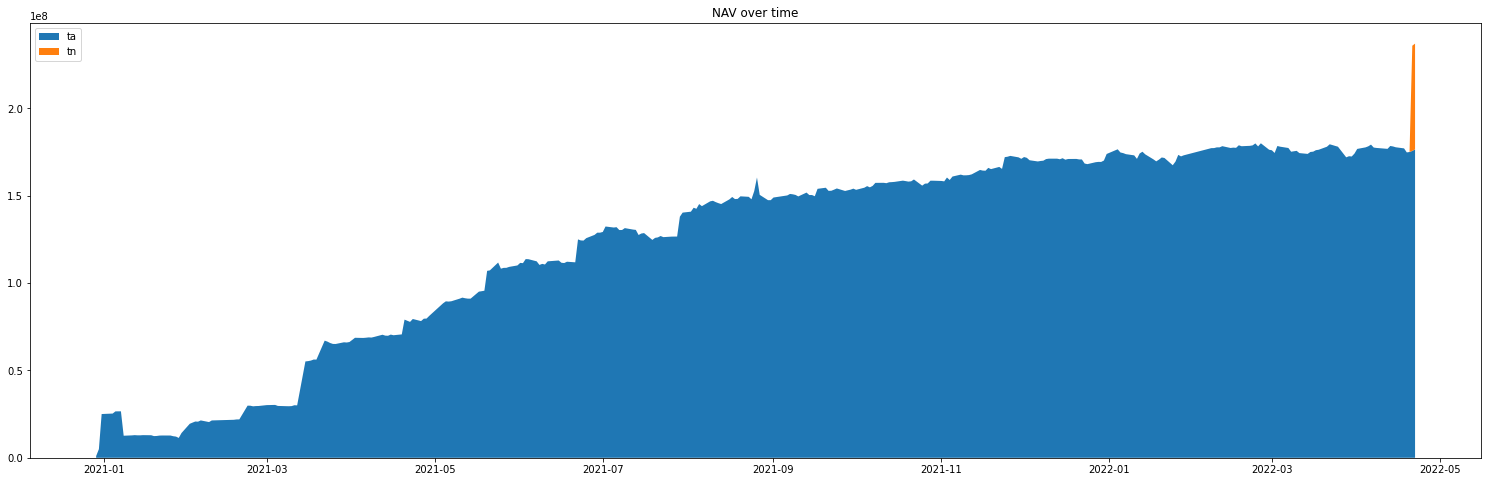

In [57]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


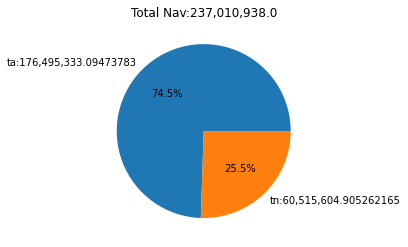

In [58]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)

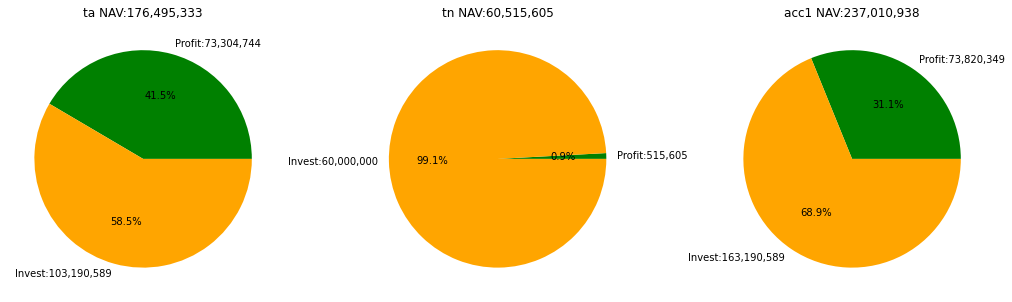

In [59]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)

### Recent 

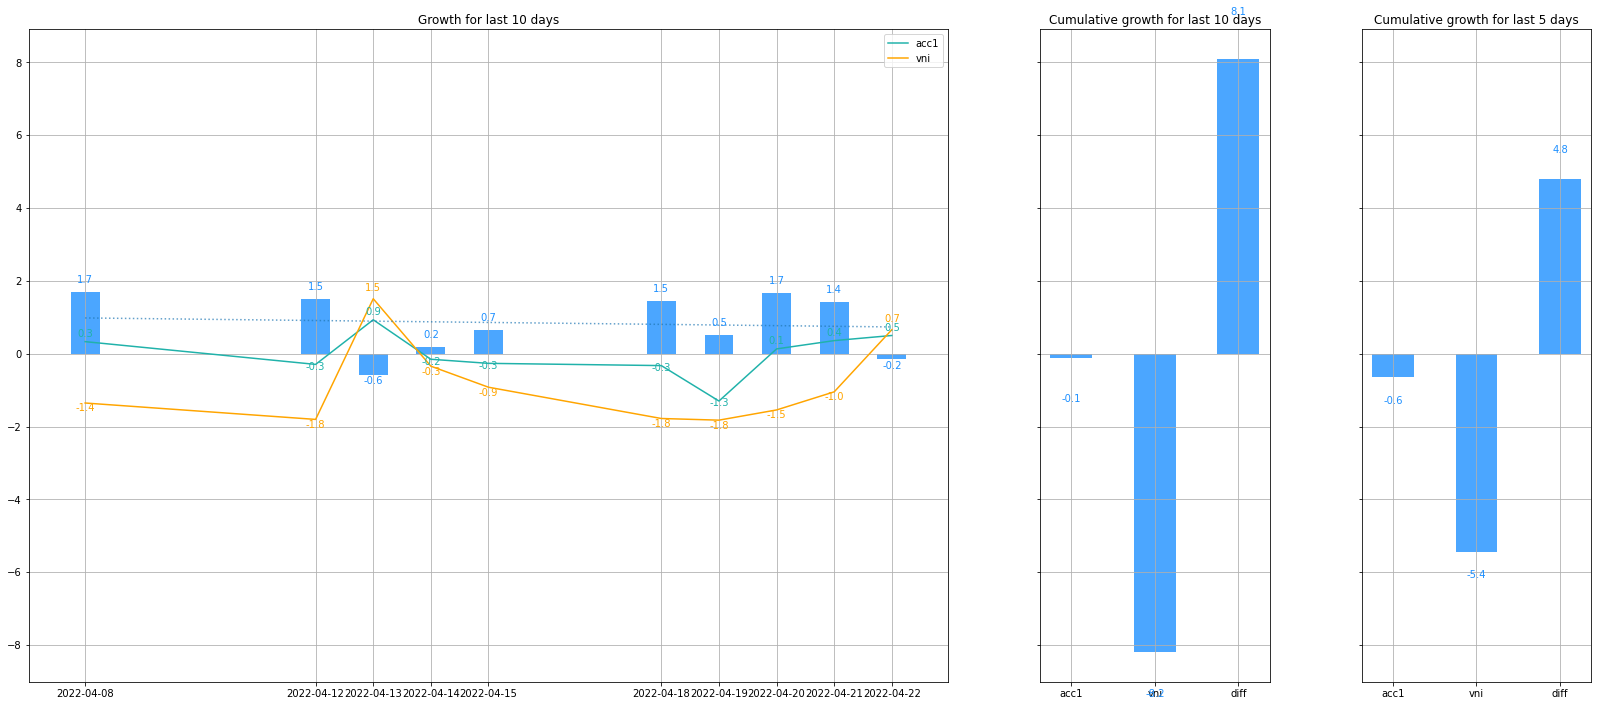

In [60]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [61]:
user_df.tail(10)

,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,acc1_diff_p,acc1_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,
2022-04-08,1482.00,-20.35,177320024,583904.0,796662.0,0.0,796662.0,176736120.0,1.767361e+08,1.000000,5.839040e+05,1.773200e+08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.003304,1.003304,-0.013545,0.986455
2022-04-12,1455.25,-26.75,176797699,-522325.0,0.0,0.0,0.0,177320024.0,1.773200e+08,1.000000,-5.223250e+05,1.767977e+08,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.002946,0.997054,-0.018050,0.981950
2022-04-13,1477.20,21.95,178443277,1645578.0,0.0,0.0,0.0,176797699.0,1.767977e+08,1.000000,1.645578e+06,1.784433e+08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.009308,1.009308,0.015083,1.015083
2022-04-14,1472.12,-5.08,178169585,-273692.0,0.0,0.0,0.0,178443277.0,1.784433e+08,1.000000,-2.736920e+05,1.781696e+08,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.001534,0.998466,-0.003439,0.996561
2022-04-15,1458.56,-13.56,177696243,-473342.0,0.0,0.0,0.0,178169585.0,1.781696e+08,1.000000,-4.733420e+05,1.776962e+08,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.002657,0.997343,-0.009211,0.990789
2022-04-18,1432.60,-25.96,177064819,-581424.0,50000.0,0.0,50000.0,177646243.0,1.776462e+08,1.000000,-5.814240e+05,1.770648e+08,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.003273,0.996727,-0.017798,0.982202
2022-04-19,1406.45,-26.15,174762491,-2302328.0,0.0,0.0,0.0,177064819.0,1.770648e+08,1.000000,-2.302328e+06,1.747625e+08,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.013003,0.986997,-0.018254,0.981746
2022-04-20,1384.72,-21.73,174991558,229067.0,0.0,0.0,0.0,174762491.0,1.747625e+08,1.000000,2.290670e+05,1.749916e+08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.001311,1.001311,-0.015450,0.984550
2022-04-21,1370.21,-14.51,235833911,842353.0,0.0,-60000000.0,-60000000.0,234991558.0,1.749916e+08,0.744672,6.272764e+05,1.756188e+08,6.000000e+07,0.255328,215076.577347,6.021508e+07,0.003585,1.003585,-0.010479,0.989521


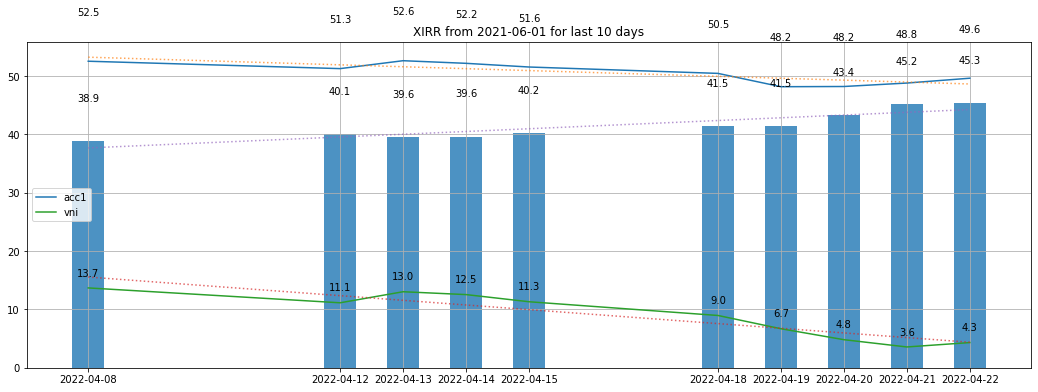

In [62]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)

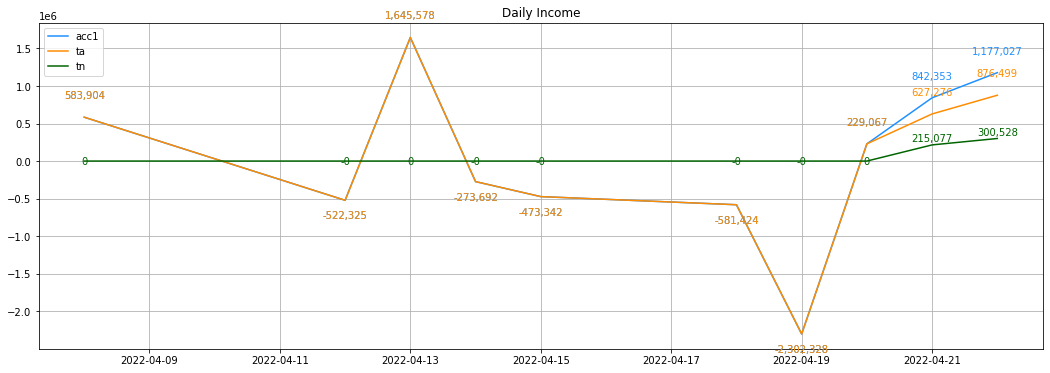

In [63]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
    color_l=const.COLOR_LIST[: len(const.ALL_ACC_NAME_L)],
)

### Diff distribution

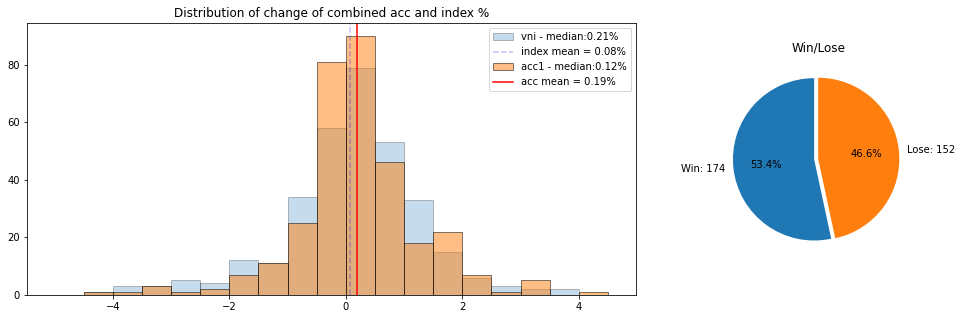

In [64]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)

### Growth XIRR

In [65]:
anchor_date = "2022-1-1"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index] ,
)

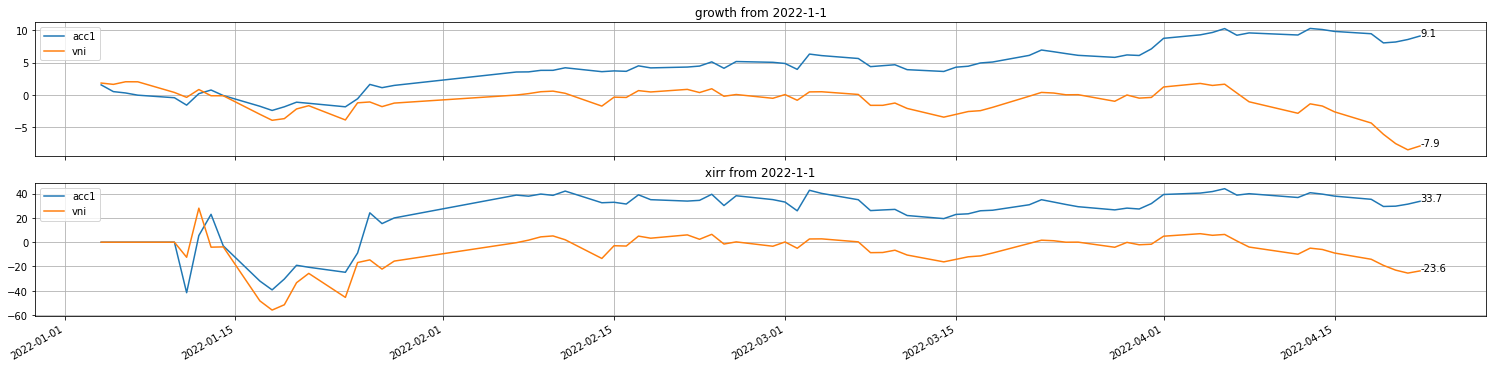

In [66]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)
